**Estimating pi**

If we inscribe a circle within a square, the A(circle)/A(square) = pi/4

So, we can estimate pi using the following algorithmic approach:
- Define domain of interest: square in which the circle is inscribed within
- Draw n i.i.d random samples from that domain (ideal value of n will be discussed later)
- Perform deterministic computation on samples: for each sample, check whether the coordinate points lie within the inscribed circle. 
- Compute fraction of points that landed within circle over the total number of samples
- Generate pi estimate by computing fraction * 4 

Note: the following implementation utilizes only standard libraries, and we sample via python looping

In [44]:
import math
import random
import time
import pandas as pd

# define sample sizes
num_samples = [10**x for x in range(1,9)]

naive_pi_df = pd.DataFrame(columns=['Sample Size', 'Pi Estimate', 'Runtime (s)'])

for sample_num in num_samples:
    
    # track simulation time for sample size
    start_time = time.time()

    # count of sampled points w/in unit circle
    hit_count = 0

    # draw n samples from coordinate space
    for i in range(sample_num):
        
        # sample from domain space: [-1, 1] x [-1, 1]
        x_coord = random.uniform(-1,1)
        y_coord = random.uniform(-1,1)
        
        # determine whether sample coordinates lie within inscribed unit circle 
        # i.e. given sample (x, y), check D[(x,y)-(0,0)] = sqrt[x^2 + y^2] < 1
        if math.sqrt(x_coord**2 + y_coord**2) < 1:
            hit_count += 1

    # compute fraction of samples that satisfy criteria
    hit_pct = hit_count / sample_num

    # solve for pi based on relation A(circle)/A(square) = pi/4
    pi_estimate = 4*hit_pct

    # end simulation elapsed time
    naive_imp_time = time.time() - start_time

    pi_sample_computation = pd.DataFrame([[sample_num, pi_estimate, naive_imp_time]], columns=naive_pi_df.columns)
    naive_pi_df = pd.concat([naive_pi_df, pi_sample_computation], ignore_index=True)

naive_pi_df



,Sample Size,Pi Estimate,Runtime (s)
0,10,3.2,0.000079
1,100,2.8,0.0
2,1000,3.096,0.000507
3,10000,3.1616,0.007211
4,100000,3.142,0.084805
5,1000000,3.140368,0.727933
6,10000000,3.141977,9.012684
7,100000000,3.141751,93.439025


General function for plotting pi estimates w.r.t sample size

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pi_estimates(pi_estimate_df):
    plt.plot(list(pi_estimate_df['Sample Size']), list(pi_estimate_df['Pi Estimate']))

    # # Add a horizontal line at y=pi
    plt.axhline(y=np.pi, color='r', linestyle='--', label=f'y={np.pi}')

    plt.xlabel('Sample Size')
    plt.xscale('log')
    plt.title('Pi Estimate w.r.t Sample Size')
    plt.legend()
    plt.show()

Pi estimates w.r.t sample size - naive implementation

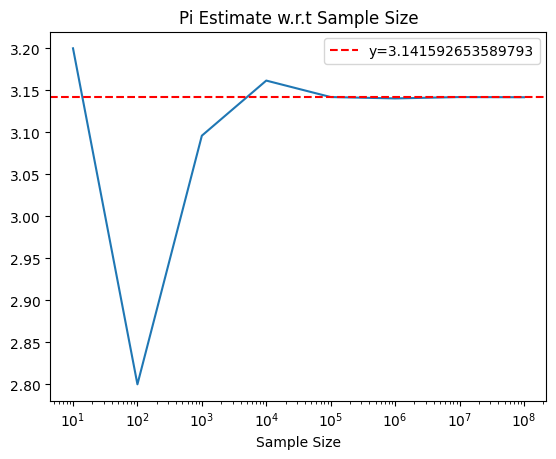

In [52]:
plot_pi_estimates(naive_pi_df)

Using numpy, no looping
- Note the difference in runtimes

In [60]:
import numpy as np
import time

# define sample sizes
num_samples = [10**x for x in range(1,9)]

np_pi_df = pd.DataFrame(columns=['Sample Size', 'Pi Estimate', 'Runtime (s)'])

pi_estimates = {} # num_samples : pi_estimate

# instantiate generator object
rng = np.random.default_rng()

np_imp_run_times = {} # sample_size : runtime

for sample_num in num_samples:  
    start_time = time.time()

    # sample from domain space: [-1, 1] x [-1, 1]
    # Matrix shape: 2 x num_sample 
    sample_coords = rng.uniform(-1, 1, size=(2,sample_num))

    # determine whether sample coordinates lie within inscribed unit circle 
    # i.e. given sample (x, y), check D[(x,y)-(0,0)] = sqrt[x^2 + y^2] < 1
    hit_count = np.sum( np.linalg.norm(x=sample_coords, axis=0) < 1 )

    # compute fraction of samples that satisfy criteria
    hit_pct = hit_count / sample_num

    # solve for pi based on relation A(circle)/A(square) = pi/4
    pi_estimate = 4*hit_pct

    # end simulation elapsed time, map to sample size
    np_imp_run_time = time.time() - start_time

    pi_sample_computation = pd.DataFrame([[sample_num, pi_estimate, np_imp_run_time]], columns=np_pi_df.columns)
    np_pi_df = pd.concat([np_pi_df, pi_sample_computation], ignore_index=True)

np_pi_df

,Sample Size,Pi Estimate,Runtime (s)
0,10,3.2,0.062481
1,100,3.28,0.0
2,1000,3.028,0.0
3,10000,3.12,0.0
4,100000,3.14124,0.0
5,1000000,3.138932,0.036056
6,10000000,3.141368,0.278223
7,100000000,3.141561,2.635528


Pi estimate w.r.t sample size - vectorized implementation

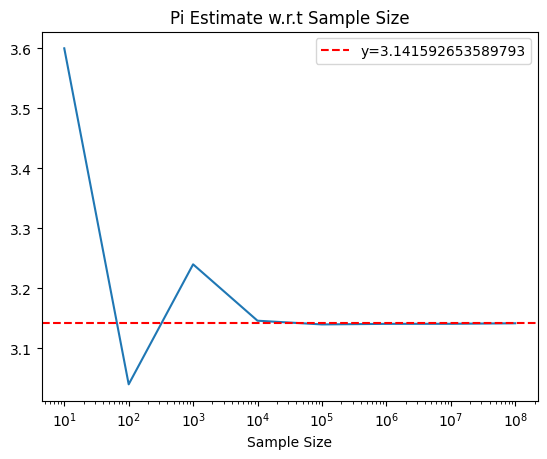

In [55]:
plot_pi_estimates(np_pi_df)

Runtime w.r.t sample size

In [124]:
import matplotlib.pyplot as plt

def plot_runtime_comparison(sample_sizes, naive_runtimes, vectorized_runtimes, simulation_name):
    plt.plot(list(sample_sizes), list(naive_runtimes), label='Naive')
    plt.plot(list(sample_sizes), list(vectorized_runtimes), label='Numpy')

    plt.xlabel('Sample Size')
    plt.xscale('log')
    plt.ylabel('Runtime (s)')
    plt.title(f'{simulation_name} Simulation Runtime w.r.t Sample Size')
    plt.legend()
    plt.show()

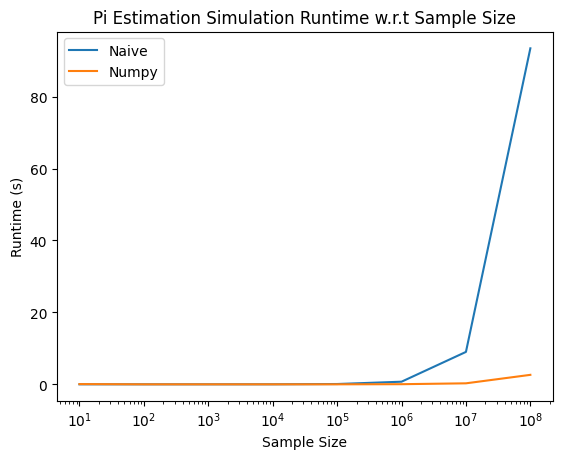

In [126]:
plot_runtime_comparison(sample_sizes=naive_pi_df['Sample Size'].unique(),
                        naive_runtimes=naive_pi_df['Runtime (s)'],
                        vectorized_runtimes=np_pi_df['Runtime (s)'],
                        simulation_name='Pi Estimation')

**Optimal Bid Strategy in First-Price Sealed-Bid Auction (FPSBA)**

We're bidding in an FPSBA against a single opponent - our valuations of the item are private, and we submit our bids simultaneously & privately.

How do we bid to optimize our expected utility?


Bid data)
- collected from class activity (26 students)
- our valuation & our classmate's valuation ~ U(10, 20,..., 100)
- generate the optimal bid strategy: for each $x \in \{10, 20,..., 100\}$, what is our optimal bid?

In [20]:
competitor_df = pd.read_csv('bid_data.csv')

competitor_df

,What is your bid when your value is 10?,What is your bid when your value is 20?,What is your bid when your value is 30?,What is your bid when your value is 40?,What is your bid when your value is 50?,What is your bid when your value is 60?,What is your bid when your value is 70?,What is your bid when your value is 80?,What is your bid when your value is 90?,What is your bid when your value is 100?
0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
1,8.0,16.0,25.0,33.0,41.0,50.0,59.0,69.0,79.0,91.0
2,9.0,17.0,24.0,31.0,38.0,45.0,52.0,59.0,66.0,73.0
3,10.0,10.0,20.0,20.0,30.0,30.0,40.0,40.0,50.0,60.0
4,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0
5,9.0,18.0,28.0,38.0,47.0,56.0,65.0,74.0,83.0,92.0
6,8.0,16.0,24.0,32.0,40.0,48.0,56.0,70.0,80.0,85.0
7,0.0,11.0,16.0,21.0,26.0,31.0,36.0,41.0,46.0,51.0
8,10.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
9,9.0,16.0,25.0,34.0,42.0,53.0,61.0,74.0,82.0,92.0


Visualize empirical class bid distribution

<Figure size 640x480 with 0 Axes>

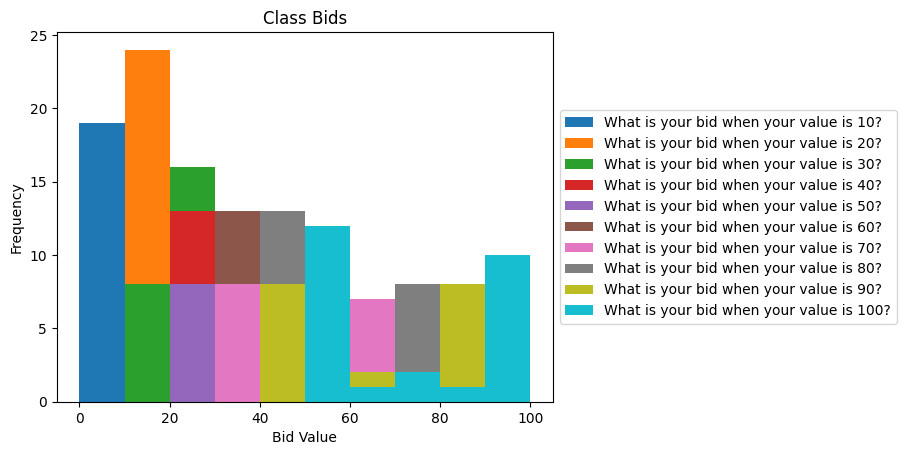

In [63]:
fig = plt.figure()
ax = competitor_df.plot.hist() 
ax.set_title("Class Bids")
ax.set_xlabel("Bid Value")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Assume random tiebreaks

In [22]:
def win_bid(competitor_bid, your_bid):
  if your_bid > competitor_bid:
    return 1
  elif your_bid == competitor_bid:
    return 1 if random.uniform(0, 1) > 0.5 else 0
  return 0

Compute optimal bid strategy via Monte Carlo approach
- Optimal bid -> bid that satisfies argmax(E[utility | bid] = P[win | bid] * (value - bid))
              -> find bid that maximizes P[win | bid]

Naive FPSBA implementation - python looping

In [146]:
import numpy as np
import time

# Random sample from domain many times (with replacement)
num_samples = [10**x for x in range(1,6)]

naive_optimal_strategy_df = pd.DataFrame(columns=['Sample Size', 'Runtime (s)', 'Value', 'Optimal Bid', 'Bid/Value', 'E[Utility]'])

for sample_size in num_samples:
  sim_start = time.time()
  # generate bid strategy
  optimal_strategy_single_sim_df = pd.DataFrame(columns=['Value', 'Optimal Bid', 'Bid/Value', 'E[Utility]']) 
  for value in np.arange(10, 110, 10):
    optimal_bid = 0
    max_utility = 0

    sampled_competitor_bids = []
    # get competitor bid dist. from repeated sampling
    for i in range(sample_size):
      # opponent value ~ U(10, 20,..., 100)
      competitor_val_col = np.random.randint(0, len(competitor_df.columns))
      # opponent bid ~ U(bids for opponent value)
      competitor_bid = random.choice(competitor_df.iloc[:, competitor_val_col].tolist())
      sampled_competitor_bids.append(competitor_bid)


    # check possible bids from [0, value] - DISCRETE (increments of 0.1)
    for potential_bid_int in range(value*10):
      potential_bid = potential_bid_int/10
      
      # compute P[win | bid]
      win_mask = [win_bid(x, potential_bid) for x in sampled_competitor_bids]
      num_wins = sum(win_mask)
      win_prob = num_wins / sample_size
      
      # E[utility | bid] = P[win | bid] * (value - bid)
      expected_utility = win_prob*(value-potential_bid)

      if expected_utility > max_utility:
        max_utility = expected_utility
        optimal_bid = potential_bid

    bid_value_ratio = optimal_bid / value*1.0
    
    optimal_bid_info = pd.DataFrame([[value, optimal_bid, bid_value_ratio, max_utility]], columns=['Value', 'Optimal Bid', 'Bid/Value', 'E[Utility]'])
    optimal_strategy_single_sim_df = pd.concat([optimal_strategy_single_sim_df, optimal_bid_info], ignore_index=True)
  
  sim_duration = time.time() - sim_start

  optimal_strategy_single_sim_df['Sample Size'] = sample_size
  optimal_strategy_single_sim_df['Runtime (s)'] = sim_duration
  naive_optimal_strategy_df = pd.concat([naive_optimal_strategy_df, optimal_strategy_single_sim_df], ignore_index=True)

naive_optimal_strategy_df

,Sample Size,Runtime (s),Value,Optimal Bid,Bid/Value,E[Utility]
0,10,0.160515,10,0,0.0,0
1,10,0.160515,20,0,0.0,0
2,10,0.160515,30,21.1,0.703333,1.78
3,10,0.160515,40,10.1,0.2525,5.98
4,10,0.160515,50,30.1,0.602,9.95
5,10,0.160515,60,20.1,0.335,7.98
6,10,0.160515,70,35.1,0.501429,17.45
7,10,0.160515,80,30.1,0.37625,39.92
8,10,0.160515,90,51.1,0.567778,27.23
9,10,0.160515,100,35.1,0.351,45.43


Vectorized implementation
- Sampling competitor bids: generate an array of random competitor bids instantly, instead of repeatedly appending via looping
- Computing win probability: vectorize with NumPy (mean) instead of performing separate sum() and division operations
- Finding maximum utility/optimal bid: vectorize with NumPy (argmax) instead of utilizing separate variable to track highest so far

In [147]:
import numpy as np
import pandas as pd
import time

# Random sample from domain many times (with replacement)
num_samples = [10**x for x in range(1,6)]

np_optimal_strategy_df = pd.DataFrame(columns=['Sample Size', 'Runtime (s)', 'Value', 'Optimal Bid', 'Bid/Value', 'E[Utility]'])

# all possible item valuations
values = np.arange(10, 110, 10)

for sample_size in num_samples:
    # Sample competitor bids all at once instead of one at a time w/ looping
    sampled_competitor_bids = np.random.choice(
        competitor_df.values.flatten(), size=sample_size
    )
    
    # bid strategy data for a given sample size
    single_sim_results = []

    sim_start = time.time()

    # Find optimal bid for each value
    for value in values:
        # Generate potential (discrete) bids from 0 to value in increments of 0.1
        potential_bids = np.arange(0, value + 0.1, 0.1)
        
        # Vectorized win_mask for all potential bids
        # len(potential_bids) x len(sampled_competitor_bids) -> each row is a win_mask against sample dist. for a given potential_bid
        win_masks = np.array([[win_bid(sampled_competitor_bid, bid) for sampled_competitor_bid in sampled_competitor_bids] for bid in potential_bids])
        
        # Calculate win probabilities for each potential bid
        win_probs = win_masks.mean(axis=1)
        
        # Calculate expected utilities
        expected_utilities = win_probs * (value - potential_bids)
        
        # Identify the optimal bid and maximum utility
        max_utility_index = np.argmax(expected_utilities)
        optimal_bid = potential_bids[max_utility_index]
        max_utility = expected_utilities[max_utility_index]
        
        # Calculate the bid/value ratio
        bid_value_ratio = optimal_bid / value

        single_sim_results.append({
            'Value': value,
            'Optimal Bid': optimal_bid,
            'Bid/Value': bid_value_ratio,
            'E[Utility]': max_utility
        })

    sim_duration = time.time() - sim_start

    optimal_strategy_single_sim_df = pd.DataFrame(single_sim_results)
    optimal_strategy_single_sim_df['Sample Size'] = sample_size
    optimal_strategy_single_sim_df['Runtime (s)'] = sim_duration
    np_optimal_strategy_df = pd.concat([np_optimal_strategy_df, optimal_strategy_single_sim_df])

np_optimal_strategy_df


,Sample Size,Runtime (s),Value,Optimal Bid,Bid/Value,E[Utility]
0,10,0.136992,10,0.0,0.0,0.0
1,10,0.136992,20,15.1,0.755,0.49
2,10,0.136992,30,20.1,0.67,1.98
3,10,0.136992,40,25.1,0.6275,4.47
4,10,0.136992,50,25.1,0.502,7.47
5,10,0.136992,60,41.0,0.683333,11.4
6,10,0.136992,70,41.0,0.585714,17.4
7,10,0.136992,80,41.1,0.51375,23.34
8,10,0.136992,90,41.1,0.456667,29.34
9,10,0.136992,100,41.0,0.41,35.4


Bid strategy derived from simulation at largest sample size (N = 100000)

In [150]:
np_optimal_strategy_df[np_optimal_strategy_df['Sample Size']==100000]

,Sample Size,Runtime (s),Value,Optimal Bid,Bid/Value,E[Utility]
0,100000,375.339131,10,5.1,0.51,0.134309
1,100000,375.339131,20,11.1,0.555,1.337136
2,100000,375.339131,30,11.1,0.37,2.839536
3,100000,375.339131,40,21.1,0.5275,5.63598
4,100000,375.339131,50,25.2,0.504,8.71472
5,100000,375.339131,60,31.1,0.518333,13.027253
6,100000,375.339131,70,41.1,0.587143,17.665125
7,100000,375.339131,80,41.1,0.51375,23.777625
8,100000,375.339131,90,41.1,0.456667,29.890125
9,100000,375.339131,100,51.1,0.511,36.933192


Comparison of FPSBA Simulation Runtimes
- Naive vs. Vectorized

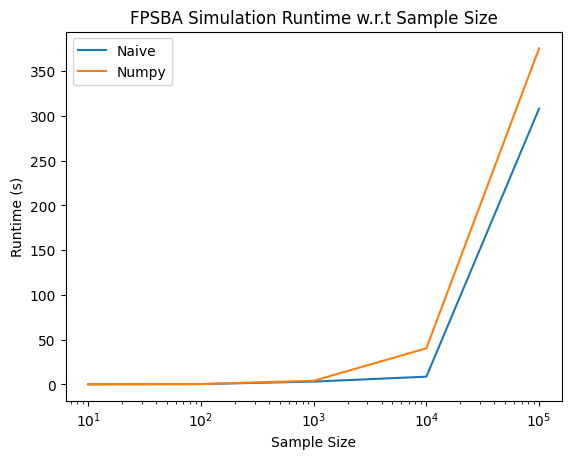

In [148]:
plot_runtime_comparison(sample_sizes=naive_optimal_strategy_df['Sample Size'].unique(),
                        naive_runtimes=naive_optimal_strategy_df['Runtime (s)'].unique(),
                        vectorized_runtimes=np_optimal_strategy_df['Runtime (s)'].unique(),
                        simulation_name='FPSBA')

"Vectorized" implementation running slower :/
- Memory Overhead? 
- Nested list comprehension?

Bid/Value Ratio
- Theoretically, in an FPSBA it's optimal to bid half your value i.e. $b(v) = \frac{v}{2}$
- Examine how our empirical bid/value ratio varies as sample size increases

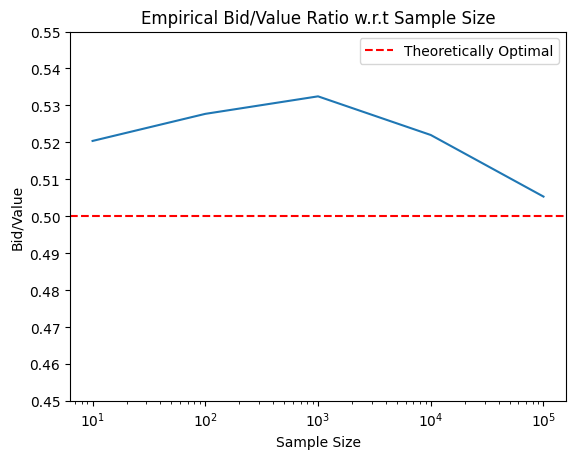

In [152]:
import numpy as np

plt.plot(list(np_optimal_strategy_df['Sample Size'].unique()), 
         list(np_optimal_strategy_df.groupby('Sample Size')['Bid/Value'].mean().reset_index()['Bid/Value']))

# Plot theoretically optimal FPSBA Bid/Value ratio
plt.axhline(y=0.5, color='r', linestyle='--', label=f'Theoretically Optimal')

plt.xlabel('Sample Size')
plt.xscale('log')
plt.ylabel('Bid/Value')
plt.title(f'Empirical Bid/Value Ratio w.r.t Sample Size')
plt.yticks(np.arange(0.45, 0.55, 0.01))  # Adjust range and step size as needed
plt.legend()
plt.show()

Note that this empirical bid/value ratio is computed from samples of our class data (26 students):
- So, this empirical bid/value ratio should converge to the ideal bid/value ratio for competing against these classmates! Which may not align exactly with theoretical optimal $b(v) = \frac{v}{2}$.
- But, the fact that our empirically optimal bid/value approaches the theoretical optimal from a small sample size (26 classmates) is supportive of the $b(v) = \frac{v}{2}$ strategy. If we had a larger sample, we would expect empirical results that more closely align with this strategy.